<a href="https://colab.research.google.com/github/siddley1001/DukeDataFest2021/blob/main/DataFest_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

sns.set_style('whitegrid')

In [ ]:
us_19 = pd.read_csv('/content/drive/MyDrive/DataFest 2021/nmurx_us_19Q1.csv', header=0, date_parser= 'DATE')
us_19.head()

,DATE,STATUS,QLANG,DEM_GENDER,DEM_AGE,DEM_POSTAL,DEM_REGION,DEM_INCOME,DEM_HOME,DEM_GENHEALTH,DEM_LIMIT,TOB_LIFE,ORDER_PAINREL,ORDER_SED,ORDER_STIM,ORDER_THC,ORDER_PAINREL_API_BHYD,ORDER_PAINREL_API_BUP,ORDER_PAINREL_API_COD,ORDER_PAINREL_API_DIHY,ORDER_PAINREL_API_ELU,ORDER_PAINREL_API_FENT,ORDER_PAINREL_API_GAB,ORDER_PAINREL_API_HYD,ORDER_PAINREL_API_HYDM,ORDER_PAINREL_API_KTM,ORDER_PAINREL_API_METH,ORDER_PAINREL_API_MORPH,ORDER_PAINREL_API_OXY,ORDER_PAINREL_API_OXYM,ORDER_PAINREL_API_PREG,ORDER_PAINREL_API_SUF,ORDER_PAINREL_API_TAP,ORDER_PAINREL_API_TRAM,BHYD_USE,BUP_USE,COD_USE,DIHY_USE,ELU_USE,FENT_USE,...,THC_NMUWK,OP_USE,OP_USEYR,OP_NMU,OP_NMUYR,OP_NMUNTY,OP_NMUMNTH,OP_NMUWK,GABA_USE,GABA_USEYR,GABA_NMU,GABA_NMUYR,GABA_NMUNTY,GABA_NMUMNTH,GABA_NMUWK,BHYD_NMUNTY,BUP_NMUNTY,COD_NMUNTY,DIHY_NMUNTY,FENT_NMUNTY,HYD_NMUNTY,HYDM_NMUNTY,METH_NMUNTY,MORPH_NMUNTY,OXY_NMUNTY,OXYM_NMUNTY,SUF_NMUNTY,TAP_NMUNTY,TRAM_NMUNTY,ILLXCAN_USE,ILLXCAN_YR,ILLXCAN_NTY,ILLXCAN_MNTH,ILLXCAN_WK,ILL_USE,ILL_YR,ILL_NTY,ILL_MNTH,ILL_WK,WT
0,2019-03-27 14:16:02,3,1,2,51,782,3,4,3,2,0,1,3,4,1,2,1,6,13,15,4,17,2,8,16,12,18,11,14,9,7,3,5,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,7074.136133
1,2019-03-24 12:42:54,3,1,2,67,604,2,1,1,2,1,3,3,2,4,1,13,11,1,15,2,3,5,10,6,8,9,17,7,12,18,16,4,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4069.460791
2,2019-03-21 08:56:26,3,1,2,71,339,3,4,2,4,0,3,1,4,2,3,1,16,7,11,3,15,14,17,4,18,2,12,10,8,6,13,9,5,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7554.618118
3,2019-03-24 14:38:49,3,1,2,68,801,4,2,1,4,0,1,2,4,1,3,16,14,7,6,10,15,18,12,11,13,5,1,3,4,9,2,17,8,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4178.061514
4,2019-03-24 12:26:53,3,1,2,69,612,2,2,2,4,0,3,2,3,4,1,9,17,2,15,6,1,4,3,7,11,18,8,5,12,10,13,16,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7033.819350


In [ ]:
def draw_missing_data_table(df):
    ''' Returns a table of % missing from each feature column in the input dataframe'''
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/ df.isnull().count()).sort_values(ascending = False)
    missing_data = pd.concat([total, percent], axis = 1, keys = ['Total','Percent Missing'])
    final_missing = missing_data.reset_index().rename(columns = 
                                                      {'index': 'feature', 
                                                       'Total': 'total null', 
                                                       'Percent Missing': '% of null values in the column'})
    return final_missing
    

In [ ]:
missing_data = draw_missing_data_table(us_19)

In [ ]:
missing_data

,feature,total null,% of null values in the column
0,EST_NMUYR,29795,0.997389
1,ELU_NMUYR,29790,0.997222
2,QUA_NMUYR,29790,0.997222
3,CLOB_NMUYR,29786,0.997088
4,MID_NMUYR,29763,0.996318
...,...,...,...
518,DEM_MARITAL,0,0.000000
519,DEM_EDU,0,0.000000
520,DEM_STDNT,0,0.000000
521,DEM_VET,0,0.000000


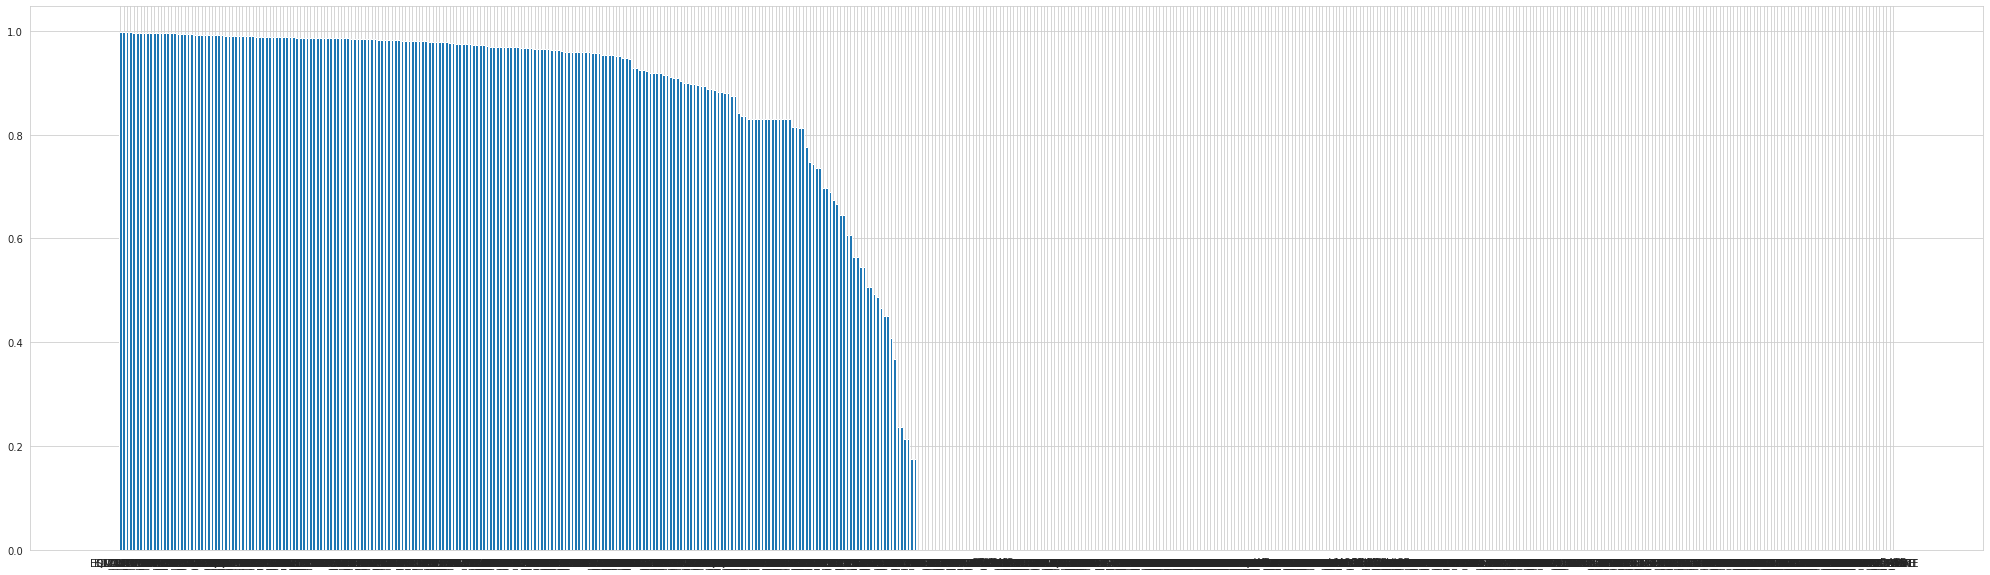

In [ ]:
plt.figure( figsize = (35,10))
plt.bar(missing_data['feature'], missing_data['% of null values in the column'])
plt.show()

In [ ]:
missing_data[missing_data['% of null values in the column'] > 0.3]

,feature,total null,% of null values in the column
0,EST_NMUYR,29795,0.997389
1,ELU_NMUYR,29790,0.997222
2,QUA_NMUYR,29790,0.997222
3,CLOB_NMUYR,29786,0.997088
4,MID_NMUYR,29763,0.996318
...,...,...,...
224,DEM_PREG,13908,0.465571
225,NAP_NMU,13474,0.451043
226,NAP_USEYR,13474,0.451043
227,ACE_NMUYR,12174,0.407525


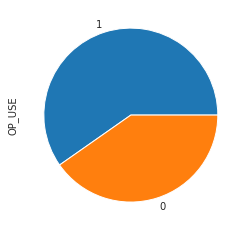

In [ ]:
us_19['OP_USE'].value_counts().plot(kind='pie')

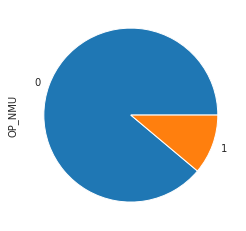

In [ ]:
us_19['OP_NMU'].value_counts().plot(kind='pie')

In [ ]:
# races = ['DEM_RACE_AIAN', 'DEM_RACE_ASIAN', 'DEM_RACE_BLACK', 'DEM_RACE_NHPI', 'DEM_RACE_WHITE', 'DEM_RACE_OTH']

In [ ]:
high_miss = missing_data.iloc[229:].feature.tolist()
us_19mod = us_19[high_miss]

In [ ]:
missing_data2 = draw_missing_data_table(us_19mod)
missing_data2.head(7)

,feature,total null,% of null values in the column
0,ASP_NMU,7090,0.237338
1,ASP_USEYR,7090,0.237338
2,ACE_USEYR,6402,0.214307
3,ACE_NMU,6402,0.214307
4,IBU_USEYR,5229,0.175041
5,IBU_NMU,5229,0.175041
6,ORDER_SED_API_ZOL,0,0.000000


## Exploring Features with a lot of Missing Values

In [ ]:
high_miss_df = missing_data2.loc[missing_data2['% of null values in the column'] != 0]
high_miss_features = high_miss_df.feature.tolist()
high_miss_features

['ASP_NMU', 'ASP_USEYR', 'ACE_USEYR', 'ACE_NMU', 'IBU_USEYR', 'IBU_NMU']

# Summary of Non Prescription use in the last 12 Months  & All-Time [High Null Values]


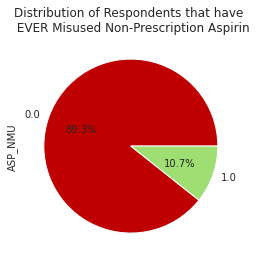

In [ ]:
PATH = '/content/drive/MyDrive/DataFest 2021/Missing Data Pics/'

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)

us_19mod['ASP_NMU'].value_counts().plot(kind = 'pie', 
                                        colors = ['#be0000', '#9ede73'], 
                                        title = 'Distribution of Respondents that have \n EVER Misused Non-Prescription Aspirin', 
                                        autopct=lambda pct: func(pct, us_19mod['ASP_NMU'].value_counts()))
plt.savefig(PATH + 'asprin_misuse.png', dpi = 400)

In [ ]:
us_19mod['ASP_NMU'].fillna(0.0, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


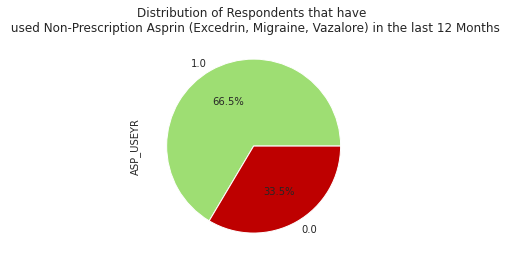

In [ ]:
us_19mod['ASP_USEYR'].value_counts().plot(kind = 'pie', 
                                          colors = ['#9ede73', '#be0000'], 
                                          title = 'Distribution of Respondents that have \n used Non-Prescription Asprin (Excedrin, Migraine, Vazalore) in the last 12 Months',
                                          autopct=lambda pct: func(pct, us_19mod['ASP_USEYR'].value_counts()))
plt.savefig(PATH + 'asprin_12mo.png', dpi = 400)

In [ ]:
us_19mod['ASP_USEYR'].fillna(0.0, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


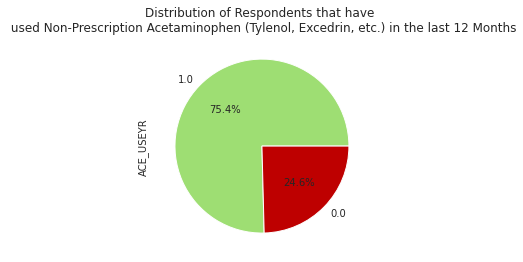

In [ ]:
us_19mod['ACE_USEYR'].value_counts().plot(kind = 'pie', 
                                          colors = ['#9ede73', '#be0000'], 
                                          title = 'Distribution of Respondents that have \n used Non-Prescription Acetaminophen (Tylenol, Excedrin, etc.) in the last 12 Months',
                                          autopct=lambda pct: func(pct, us_19mod['ACE_USEYR'].value_counts()))
plt.savefig(PATH + 'acetaminiophen_12mo.png', dpi = 400)

In [ ]:
us_19mod['ACE_USEYR'].fillna(0.0, inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


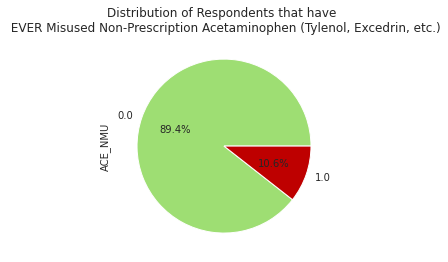

In [ ]:
us_19mod['ACE_NMU'].value_counts().plot(kind = 'pie', 
                                        colors = ['#9ede73', '#be0000'], 
                                        title = 'Distribution of Respondents that have \n EVER Misused Non-Prescription Acetaminophen (Tylenol, Excedrin, etc.)',
                                        autopct=lambda pct: func(pct, us_19mod['ACE_NMU'].value_counts()))
plt.savefig(PATH + 'acetaminiophen_ever.png', dpi = 400)

In [ ]:
us_19mod['ACE_NMU'].fillna(0.0, inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


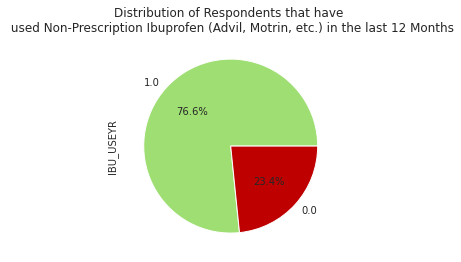

In [ ]:
us_19mod['IBU_USEYR'].value_counts().plot(kind = 'pie', 
                                          colors = ['#9ede73', '#be0000'], 
                                          title = 'Distribution of Respondents that have \n used Non-Prescription Ibuprofen (Advil, Motrin, etc.) in the last 12 Months',
                                          autopct=lambda pct: func(pct, us_19mod['IBU_USEYR'].value_counts()))
plt.savefig(PATH + 'Ibuprofen_12mo.png', dpi = 400)

In [ ]:
us_19mod['IBU_USEYR'].fillna(0.0, inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


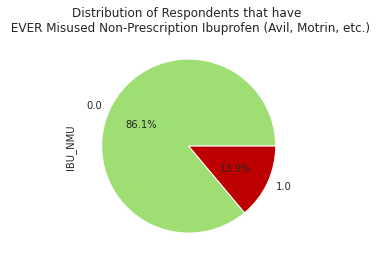

In [ ]:
us_19mod['IBU_NMU'].value_counts().plot(kind = 'pie', 
                                        colors = ['#9ede73', '#be0000'], 
                                        title = 'Distribution of Respondents that have \n EVER Misused Non-Prescription Ibuprofen (Avil, Motrin, etc.)',
                                        autopct=lambda pct: func(pct, us_19mod['IBU_NMU'].value_counts()))
plt.savefig(PATH + 'Ibuprofen_ever.png', dpi = 400)

In [ ]:
us_19mod['IBU_NMU'].fillna(0.0, inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
print('Now we have a DataSet with no missing values')
draw_missing_data_table(us_19mod)

Now we have a DataSet with no missing values


,feature,total null,% of null values in the column
0,DATE,0,0.0
1,SED_USE,0,0.0
2,ORDER_PAINREL_API_COD,0,0.0
3,ORDER_SED_API_TEM,0,0.0
4,ORDER_SED_API_TRI,0,0.0
...,...,...,...
289,GABA_NMU,0,0.0
290,GABA_NMUYR,0,0.0
291,GABA_NMUNTY,0,0.0
292,GABA_NMUMNTH,0,0.0


# Objective Question: How does drug use vary according to Race

In [ ]:
us_19mod.dtypes.value_counts()

int64      270
float64     21
object       3
dtype: int64

In [ ]:
#Check columns that have Strings, us_19mod.dtypes[us_19mod.dtypes == 'object'].index.tolist()
string_cols = []
for col in us_19mod.dtypes[us_19mod.dtypes == 'object'].index:
    print(col)

DEM_STATE
START_DATE
DATE


In [ ]:
len(us_19mod.dtypes == 'object')

294

In [ ]:
us_19mod[['DATE', 'START_DATE', 'DEM_STATE']]

,DATE,START_DATE,DEM_STATE
0,2019-03-27 14:16:02,2019-03-27 13:03:03,TX
1,2019-03-24 12:42:54,2019-03-24 12:32:17,IL
2,2019-03-21 08:56:26,2019-03-21 08:49:42,FL
3,2019-03-24 14:38:49,2019-03-24 14:19:50,CO
4,2019-03-24 12:26:53,2019-03-24 12:19:52,IL
...,...,...,...
29868,2019-04-04 06:46:23,2019-04-04 06:31:24,NJ
29869,2019-03-29 09:15:03,2019-03-29 09:07:44,MO
29870,2019-04-03 10:55:57,2019-04-03 10:48:05,NC
29871,2019-03-28 15:58:18,2019-03-28 15:52:16,CA


In [ ]:
warnings.filterwarnings('ignore')

us_19mod['DATE'] = pd.to_datetime(us_19mod.loc[:, 'DATE'])
us_19mod['START_DATE'] = pd.to_datetime(us_19mod.loc[:, 'START_DATE'])
print(str(us_19mod.loc[:, 'DATE'].min()) + ' || ' + str(us_19mod.loc[:, 'DATE'].max()))
print('All responses were within 2 months of each other\n\n')

2019-03-11 19:30:28 || 2019-05-12 21:15:22
All responses were within 2 months of each other




In [ ]:
us_19mod['START_DATE'].min(), us_19mod['START_DATE'].max()
print('All responses were within 2 months of each other')

All responses were within 2 months of each other


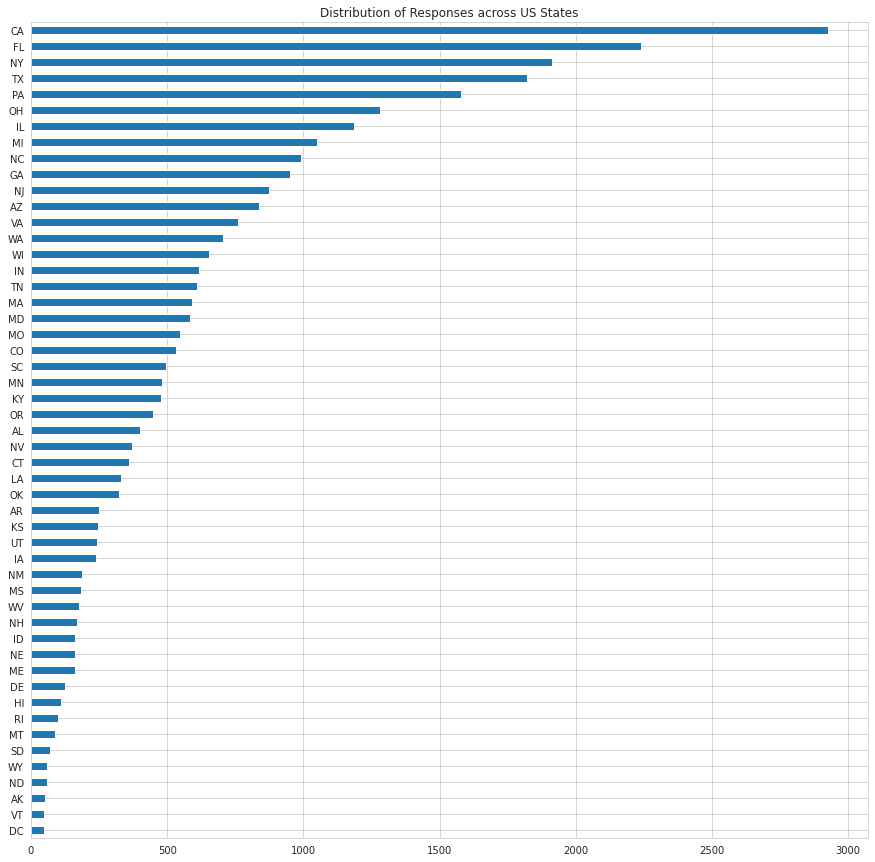

In [ ]:
us_19mod['DEM_STATE'].value_counts(ascending = True).plot(kind = 'barh', figsize=(15,15), title= 'Distribution of Responses across US States')

In [ ]:
#NO Region values are missing
us_19mod.DEM_REGION.isna().sum()

0

([<matplotlib.axis.XTick at 0x7fc2b644bc90>,
 [Text(0, 0, 'Northeast'),
  Text(0, 0, 'Midwest'),
  Text(0, 0, 'West'),
  Text(0, 0, 'South')])

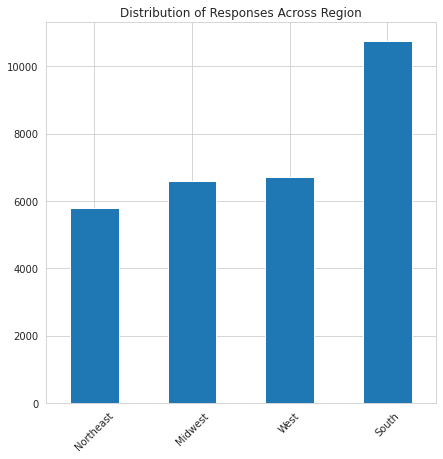

In [ ]:
us_19mod['DEM_REGION'].value_counts(ascending = True).plot(kind = 'bar', figsize=(7,7), title = 'Distribution of Responses Across Region')
plt.xticks(range(4), labels=['Northeast', 'Midwest', 'West' ,'South'], rotation = 45)

In [ ]:
us_19mod.drop(['DATE', 'START_DATE', 'DEM_STATE'], axis=1, inplace = True)

In [ ]:
#Export Data as 
us_19mod.to_csv('/content/drive/MyDrive/DataFest 2021/19_Cleaned_Data.csv')

# ISOLATE OPIOID VARIABLES AND RUN BASE REGRESSIONS

In [ ]:
total_mod_features = us_19mod.columns.tolist()

In [ ]:
weighted_features = [x for x in total_mod_features if x.startswith('ORDER_')]
weightless_features = [x for x in total_mod_features if x not in weighted_features]

time_features = [x for x in weightless_features if x.startswith('TIME_')]
timeless_features = [x for x in weightless_features if x not in time_features]

timeless_features

['ASP_NMU',
 'ASP_USEYR',
 'ACE_USEYR',
 'ACE_NMU',
 'IBU_USEYR',
 'IBU_NMU',
 'MORPH_USE',
 'OXY_USE',
 'METH_USE',
 'HYDM_USE',
 'KTM_USE',
 'TOB_LIFE',
 'GAB_USE',
 'DEM_HOME',
 'DEM_GENHEALTH',
 'DEM_LIMIT',
 'HYD_USE',
 'DEM_INCOME',
 'DEM_REGION',
 'OXYM_USE',
 'STATUS',
 'QLANG',
 'BHYD_USE',
 'DEM_GENDER',
 'DEM_AGE',
 'BUP_USE',
 'COD_USE',
 'DIHY_USE',
 'DEM_POSTAL',
 'ELU_USE',
 'FENT_USE',
 'PREG_USE',
 'CLOB_USE',
 'CLOR_USE',
 'DIA_USE',
 'EST_USE',
 'ESZ_USE',
 'FLUR_USE',
 'LORA_USE',
 'MID_USE',
 'OXA_USE',
 'QUA_USE',
 'TEM_USE',
 'TRI_USE',
 'ZAL_USE',
 'ZOL_USE',
 'AMPH_USE',
 'ATOM_USE',
 'MPHEN_USE',
 'MOD_USE',
 'CANN_USE',
 'DRON_USE',
 'NAB_USE',
 'CLON_USE',
 'SUF_USE',
 'CHL_USE',
 'TAP_USE',
 'TRAM_USE',
 'ALP_USE',
 'BAC_USE',
 'WT',
 'OTH_RX_DRUG_USE',
 'SED_USE',
 'DAST_SUM',
 'DAST_CAT',
 'PAINREL_USE',
 'PAINREL_USEYR',
 'PAINREL_NMU',
 'PAINREL_NMUYR',
 'PAINREL_NMUNTY',
 'PAINREL_NMUMNTH',
 'PAINREL_NMUWK',
 'SED_USEYR',
 'STIM_NMUMNTH',
 'SED_NMU',
 

Crafting Models:
*   Target Var: 
        -Non Medical Opioid Abuse (OP_NMU)
*   Explanatory Vars:
        - Sex (DEM_GENDER)
        - Age (DEM_AGE)
        - Location (DEM_REGION)
        - Education Level (DEM_EDU)
        - Income Level (DEM_INCOME)
        - Race?

In [ ]:
us_19mod['OP_NMU'].value_counts()

0    26554
1     3319
Name: OP_NMU, dtype: int64

In [ ]:
us_19mod['DEM_MALE'] = us_19mod['DEM_GENDER'].apply(lambda sex: 1 if sex == 1 else 0)

In [ ]:
us_19mod['DEM_REGION_NE'] = us_19mod['DEM_REGION'].apply(lambda reg: 1 if reg == 1 else 0)
us_19mod['DEM_REGION_MW'] = us_19mod['DEM_REGION'].apply(lambda reg: 1 if reg == 2 else 0)
us_19mod['DEM_REGION_S'] = us_19mod['DEM_REGION'].apply(lambda reg: 1 if reg == 3 else 0)

In [ ]:
def corr_df(x, corr_val):
    '''
    Obj: Drops features that are strongly correlated to other features.
          This lowers model complexity, and aids in generalizing the model.
    Inputs:
          df: features df (x)
          corr_val: Columns are dropped relative to the corr_val input (e.g. 0.8)
    Output: df that only includes uncorrelated features
    '''

    # Creates Correlation Matrix and Instantiates
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterates through Correlation Matrix Table to find correlated columns
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = item.values
            if val >= corr_val:
                # Prints the correlated feature set and the corr val
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(i)

    drops = sorted(set(drop_cols))[::-1]

    # Drops the correlated columns
    for i in drops:
        col = x.iloc[:, (i+1):(i+2)].columns.values
        df = x.drop(col, axis=1)

    return df

In [ ]:
corr_cols = ['PAINREL_NMUWK', 'PAINREL_NMUNTY', 'SED_NMUWK', 'SED_NMUNTY', 'STIM_USE', 'AMPH_USE', 'DEM_AGE10', 'DEM_ZIP', 'DEM_POSTAL', 'STIM_NMUNTY',
             'STIM_NMUWK', 'CAN_USE', 'THC_NMUMNTH', 'THC_NMUWK', 'PAINREL_USE', 'PAINREL_USEYR', 'PAINREL_NMU', 'PAINREL_NMUYR', 'PAINREL_NMUNTY', 
             'PAINREL_NMUMNTH', 'PAINREL_NMUWK', 'OP_NMU']
corrless_features = [x for x in timeless_features if x not in corr_cols]

nmunty_features = [x for x in corrless_features if x.endswith('_NMUNTY')]
corrless_features = [x for x in corrless_features if x not in nmunty_features]

len(corrless_features)

167

In [ ]:
from sklearn.model_selection import train_test_split

# MODEL 1
# full_X = us_19mod[['DEM_GENDER', 'DEM_AGE', 'DEM_REGION', 'DEM_EDU', 'DEM_INCOME']]    

# MODEL 2
# full_X = us_19mod[['DEM_MALE', 'DEM_AGE', 
#                    'DEM_REGION_NE', 'DEM_REGION_MW', 'DEM_REGION_S', 
#                    'DEM_EDU', 'DEM_INCOME']]

#MODEL 3
# full_X = us_19mod[['DEM_MALE', 'DEM_AGE', 
#                    'DEM_REGION_NE', 'DEM_REGION_MW', 'DEM_REGION_S', 
#                    'DEM_EDU', 'DEM_INCOME',
#                    'DEM_RACE_AIAN', 'DEM_RACE_ASIAN', 'DEM_RACE_BLACK', 'DEM_RACE_NHPI', 'DEM_RACE_WHITE']]

# MODEL 4
# full_X = us_19mod[['DEM_MALE', 'DEM_AGE', 
#                    'DEM_REGION_NE', 'DEM_REGION_MW', 'DEM_REGION_S', 
#                    'DEM_EDU', 'DEM_INCOME',
#                    'DEM_RACE_AIAN', 'DEM_RACE_ASIAN', 'DEM_RACE_BLACK', 'DEM_RACE_NHPI', 'DEM_RACE_WHITE',
#                    'DAST_1', 'DAST_2', 'DAST_3', 'DAST_4', 'DAST_5', 'DAST_6', 'DAST_7', 'DAST_8', 'DAST_9', 'DAST_10']]

# # MODEL 5 -- Mental Health Diagnosis, includes different variations
# ## IGNORE: 'DEM_HOSPSTAY', 'DEM_HEALTH', 'DEM_INSUR', 'MENT_ANYANX', 'MENT_OCD'
# full_X = us_19mod[['DEM_MALE', 'DEM_AGE', 
#                    'DEM_REGION_NE', 'DEM_REGION_MW', 'DEM_REGION_S', 
#                    'DEM_EDU', 'DEM_INCOME',
#                    'DEM_RACE_AIAN', 'DEM_RACE_ASIAN', 'DEM_RACE_BLACK', 'DEM_RACE_NHPI', 'DEM_RACE_WHITE',
#                    'DEM_STDNT', 'DEM_VET', 'DEM_HEALTH', 'DEM_INSUR', 'DEM_HOSPSTAY', 'DEM_MARITAL',
#                    'MENT_ANYANX', 'MENT_AUT', 'MENT_BIP', "MENT_BPD", 'MENT_DEP', 'MENT_EAT', 'MENT_OCD', 'MENT_PPD', 'MENT_PTSD', 'MENT_SCH', 'MENT_OTH', 'MENT_NONE']]


# MODEL 6 -- ILLICIT drug _USE
## TRT_ & _FIRST & _REC VARS ALL DELETED*
## IGNORE: 'DEM_HOSPSTAY', 'DEM_HEALTH', 'DEM_INSUR', 'MENT_ANYANX', 'MENT_OCD'
# full_X = us_19mod[['DEM_MALE', 'DEM_AGE', 
#                    'DEM_REGION_NE', 'DEM_REGION_MW', 'DEM_REGION_S', 
#                    'DEM_EDU', 'DEM_INCOME',
#                    'DEM_RACE_AIAN', 'DEM_RACE_ASIAN', 'DEM_RACE_BLACK', 'DEM_RACE_NHPI', 'DEM_RACE_WHITE',
#                    'DEM_STDNT', 'DEM_VET', 'DEM_HEALTH', 'DEM_INSUR', 'DEM_HOSPSTAY', 'DEM_MARITAL',
#                    'COKE_USE', 'CRACK_USE', 'MDMA_USE', 'GHB_USE', 'ALKY_USE', 'KRAT_USE', 'SPEED_USE', 'METHAM_USE', 'NPFENT_USE', 'HEROIN_USE', 'KET_USE', 'MEPH_USE', 'LSD_USE', 'MUSH_USE', 'PCP_USE', 'MESC_USE', 'SPICE_USE', 'SAL_USE', 'STER_USE']]

# MODEL 7 - Pain Reliever _USE
# full_X = us_19mod[['DEM_MALE', 'DEM_AGE', 
#                    'DEM_REGION_NE', 'DEM_REGION_MW', 'DEM_REGION_S', 
#                    'DEM_EDU', 'DEM_INCOME',
#                    'DEM_RACE_AIAN', 'DEM_RACE_ASIAN', 'DEM_RACE_BLACK', 'DEM_RACE_NHPI', 'DEM_RACE_WHITE',
#                    'BHYD_USE', 'BUP_USE', 'COD_USE', 'DIHY_USE', 'ELU_USE', 'FENT_USE', 'GAB_USE', 'HYD_USE', 'HYDM_USE', 'KTM_USE', 'METH_USE', 'MORPH_USE', 'OXY_USE', 'OXYM_USE', 'PREG_USE', 'SUF_USE', 'TAP_USE', 'TRAM_USE']]

# MODEL 8 - Full
# full_X = us_19mod[corrless_features]

# full_y = us_19mod.OP_NMU

# X_train, X_test, y_train, y_test = train_test_split(full_X, full_y, test_size = 0.2, random_state = 42)
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

In [ ]:
# corr_df(X_train, 0.75)


In [ ]:
plt.figure(figsize = (25,25))
sns.heatmap(full_X.corr(), annot = True, cmap = "Blues")
plt.show()

NameError: ignored

<Figure size 1800x1800 with 0 Axes>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
params = dict(solver=solver_list)
log_reg = LogisticRegression(C=1, n_jobs=-1, random_state=34)
clf = GridSearchCV(log_reg, params, cv=5)
clf.fit(X_train, y_train)
scores = clf.cv_results_['mean_test_score']

for score, solver in zip(scores, solver_list):
    print(f"  {solver} {score:.3f}" )

In [ ]:
from sklearn.metrics import accuracy_score
clf_ll = LogisticRegression(C=1, n_jobs=-1, random_state=34, solver = 'liblinear')
clf_ng = LogisticRegression(C=1, n_jobs=-1, random_state=34, solver = 'newton-cg')

clf_ll.fit(X_train, y_train)
clf_ng.fit(X_train, y_train)

ll_predictions = clf_ll.predict(X_test)
ng_predictions = clf_ng.predict(X_test)

accuracy_score(ll_predictions, y_test), accuracy_score(ng_predictions, y_test) #naturally the more features you add the more variation you're gonna be able to capture and produce a better accuracy score.


In [ ]:
from xgboost import XGBClassifier

xgbc = XGBClassifier(max_depth=8, random_state= 42)
xgbc.fit(X_train, y_train)

preds = xgbc.predict(X_test)

predictions = [round(value) for value in preds]
accuracy_score(y_test, predictions)

In [ ]:
pd.DataFrame(zip(X_train, xgbc.feature_importances_)).sort_values(1, ascending= False).head(10)

In [ ]:
import statsmodels.api as sm

#adding constant to X
X_train_with_constant = sm.add_constant(X_train)
X_test_with_constant = sm.add_constant(X_test)

# building the model and fitting the data
sm_model_all_predictors = sm.Logit(y_train, X_train_with_constant).fit()

all_predicted_test = sm_model_all_predictors.predict(X_test_with_constant)>.5

# printing the summary table
print(sm_model_all_predictors.params)
print('-----------------------------------------------------------------')
sm_model_all_predictors.summary()

NameError: ignored

In [ ]:
#calculate the accuracy
print(f"test: {(y_test==all_predicted_test).mean()}")

## Final Model

In [ ]:
vars_to_include = ['ASP_NMU', 'ACE_NMU', 'IBU_NMU', 
                   'OXY_USE', 'HYD_USE', 'TRI_USE', 'DRON_USE', 'TRAM_USE', 'ALP_USE', 'BAC_USE', 'OTH_RX_DRUG_USE', 
                   'DEM_HOME'] 

base_dems = ['DEM_MALE', 'DEM_AGE', 
            'DEM_REGION_NE', 'DEM_REGION_MW', 'DEM_REGION_S', 
            'DEM_EDU', 'DEM_INCOME',
            'DEM_RACE_AIAN', 'DEM_RACE_ASIAN', 'DEM_RACE_BLACK', 'DEM_RACE_NHPI', 'DEM_RACE_WHITE',
            'DEM_INSUR', 'DEM_MARITAL']

dast_feats = ['DAST_1', 'DAST_2', 'DAST_3', 'DAST_4', 'DAST_5', 'DAST_6', 'DAST_7', 'DAST_8', 'DAST_9', 'DAST_10']

illicit_drug_use = ['COKE_USE', 'KRAT_USE', 'SPEED_USE', 'METHAM_USE', 'NPFENT_USE',  'LSD_USE']

pain_reliever_use = ['BHYD_USE', 'BUP_USE', 'COD_USE', 'DIHY_USE', 'ELU_USE', 'FENT_USE', 'GAB_USE',
                     'KTM_USE', 'METH_USE', 'MORPH_USE', 'OXYM_USE', 'SUF_USE', 'TAP_USE']

FINAL_X = vars_to_include + base_dems + dast_feats + illicit_drug_use + pain_reliever_use

# MODEL 8 - Full
full_X = us_19mod[FINAL_X]
full_y = us_19mod.OP_NMU

X_train, X_test, y_train, y_test = train_test_split(full_X, full_y, test_size = 0.2, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)                   

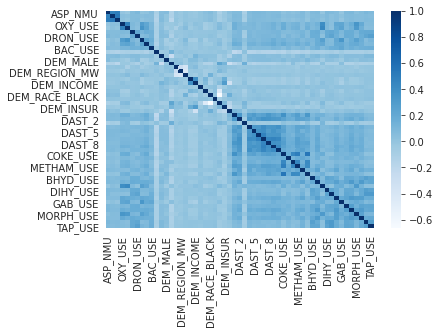

In [ ]:
sns.heatmap(full_X.corr(), cmap = "Blues")

In [ ]:
len(us_19.columns.tolist())

523

In [ ]:
len(FINAL_X)

55

In [ ]:
#adding constant to X
X_train_with_constant = sm.add_constant(X_train)
X_test_with_constant = sm.add_constant(X_test)

# building the model and fitting the data
sm_model_all_predictors = sm.Logit(y_train, X_train_with_constant).fit()

all_predicted_test = sm_model_all_predictors.predict(X_test_with_constant)>.5

# printing the summary table
print(sm_model_all_predictors.params)
print('-----------------------------------------------------------------')
sm_model_all_predictors.summary()

Optimization terminated successfully.
         Current function value: 0.217859
         Iterations 8
const             -0.935129
ASP_NMU            0.550018
ACE_NMU            0.406922
IBU_NMU            0.542487
OXY_USE            0.439480
HYD_USE            0.627998
TRI_USE            0.660792
DRON_USE           0.559989
TRAM_USE           0.500890
ALP_USE            0.114339
BAC_USE            0.154317
OTH_RX_DRUG_USE   -1.379829
DEM_HOME           0.018233
DEM_MALE           0.383071
DEM_AGE           -0.028998
DEM_REGION_NE     -0.124787
DEM_REGION_MW     -0.153743
DEM_REGION_S      -0.065213
DEM_EDU           -0.003937
DEM_INCOME        -0.023757
DEM_RACE_AIAN     -0.167077
DEM_RACE_ASIAN    -0.197548
DEM_RACE_BLACK     0.070516
DEM_RACE_NHPI     -0.181208
DEM_RACE_WHITE    -0.455088
DEM_INSUR          0.119391
DEM_MARITAL       -0.046728
DAST_1             0.549561
DAST_2             0.575598
DAST_3            -0.313494
DAST_4            -0.067310
DAST_5             0.259204
DA

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 OP_NMU   No. Observations:                17923
Model:                          Logit   Df Residuals:                    17867
Method:                           MLE   Df Model:                           55
Date:                Sun, 11 Apr 2021   Pseudo R-squ.:                  0.3686
Time:                        20:12:13   Log-Likelihood:                -3904.7
converged:                       True   LL-Null:                       -6184.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.9351      0.237     -3.953      0.000      -1.399      -0.471
ASP_NMU             0.5500      0.104      5.294      0.000       0.346       0.754
ACE_NMU             0.4069      0.102      3.972      0.000       0.206       0.608
IBU_NMU             0.5425      0.094      5.769      0.000       0.358       0.727
OXY_USE             0.4395      0.071      6.175      0.000       0.300       0.579
HYD_USE             0.6280      0.076      8.297      0.000       0.480       0.776
TRI_USE             0.6608      0.167      3.947      0.000       0.333       0.989
DRON_USE            0.5600      0.193      2.899      0.004       0.181       0.939
TRAM_USE            0.5009      0.073      6.849      0.000       0.358       0.644
ALP_USE             0.1143      0.080      1.423      0.155      -0.043       0.272
BAC_USE             0.1543      0.143      1.075      0.282      -0.127       0.436
OTH_RX_DRUG_USE    -1.3798      0.080    -17.188      0.000      -1.537      -1.222
DEM_HOME            0.0182      0.015      1.179      0.239      -0.012       0.049
DEM_MALE            0.3831      0.063      6.052      0.000       0.259       0.507
DEM_AGE            -0.0290      0.002    -12.364      0.000      -0.034      -0.024
DEM_REGION_NE      -0.1248      0.096     -1.298      0.194      -0.313       0.064
DEM_REGION_MW      -0.1537      0.093     -1.660      0.097      -0.335       0.028
DEM_REGION_S       -0.0652      0.080     -0.813      0.416      -0.222       0.092
DEM_EDU            -0.0039      0.018     -0.217      0.828      -0.039       0.032
DEM_INCOME         -0.0238      0.027     -0.884      0.377      -0.076       0.029
DEM_RACE_AIAN      -0.1671      0.208     -0.802      0.423      -0.576       0.241
DEM_RACE_ASIAN     -0.1975      0.175     -1.127      0.260      -0.541       0.146
DEM_RACE_BLACK      0.0705      0.143      0.495      0.621      -0.209       0.350
DEM_RACE_NHPI      -0.1812      0.398     -0.455      0.649      -0.961       0.599
DEM_RACE_WHITE     -0.4551      0.127     -3.580      0.000      -0.704      -0.206
DEM_INSUR           0.1194      0.069      1.724      0.085      -0.016       0.255
DEM_MARITAL        -0.0467      0.020     -2.354      0.019      -0.086      -0.008
DAST_1              0.5496      0.082      6.676      0.000       0.388       0.711
DAST_2              0.5756      0.157      3.673      0.000       0.268       0.883
DAST_3             -0.3135      0.075     -4.163      0.000      -0.461      -0.166
DAST_4             -0.0673      0.144     -0.468      0.640      -0.349       0.215
DAST_5              0.2592      0.096      2.697      0.007       0.071       0.448
DAST_6              0.1404      0.156      0.900      0.368      -0.165       0.446
DAST_7              0.2095      0.173      1.212      0.226      -0.129       0.548
DAST_8              0.2143      0.146      1.467      0.142      -0.072       0.501
DAST_9              0.3398      0.123      2.760 

In [ ]:
print(f"test: {(y_test==all_predicted_test).mean()}")

test: 0.9089539748953975


In [ ]:
(us_19.QTIME.mean() *57 )/ 523
print('Survey length can go from 15 minutes to 2 minutes')

In [ ]:
(13/15)*100